**IMPORTING LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

**READING THE DATASET**

In [ ]:
df = pd.read_csv('12_coin_Bitcoin.csv')
print(df.head())

   SNo     Name Symbol                 Date        High         Low  \
0    1  Bitcoin    BTC  2013-04-29 23:59:59  147.488007  134.000000   
1    2  Bitcoin    BTC  2013-04-30 23:59:59  146.929993  134.050003   
2    3  Bitcoin    BTC  2013-05-01 23:59:59  139.889999  107.720001   
3    4  Bitcoin    BTC  2013-05-02 23:59:59  125.599998   92.281898   
4    5  Bitcoin    BTC  2013-05-03 23:59:59  108.127998   79.099998   

         Open       Close  Volume     Marketcap  
0  134.444000  144.539993     0.0  1.603769e+09  
1  144.000000  139.000000     0.0  1.542813e+09  
2  139.000000  116.989998     0.0  1.298955e+09  
3  116.379997  105.209999     0.0  1.168517e+09  
4  106.250000   97.750000     0.0  1.085995e+09  


In [ ]:
df.describe()

,SNo,High,Low,Open,Close,Volume,Marketcap
count,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000,2.991000e+03,2.991000e+03
mean,1496.000000,6893.326038,6486.009539,6700.146240,6711.290443,1.090633e+10,1.208761e+11
std,863.571653,11642.832456,10869.032130,11288.043736,11298.141921,1.888895e+10,2.109438e+11
min,1.000000,74.561096,65.526001,68.504997,68.431000,0.000000e+00,7.784112e+08
25%,748.500000,436.179001,422.879486,430.445496,430.569489,3.036725e+07,6.305579e+09
50%,1496.000000,2387.610107,2178.500000,2269.889893,2286.409912,9.460360e+08,3.741503e+10
75%,2243.500000,8733.926948,8289.800459,8569.656494,8576.238715,1.592015e+10,1.499957e+11
max,2991.000000,64863.098908,62208.964366,63523.754869,63503.457930,3.509679e+11,1.186364e+12


**Create target column and preprocess date**

In [ ]:
# Create a target column by averaging low + high
df['target'] = (df['High'] + df['Low']) / 2

# Drop the open and close columns
df = df.drop(['Open', 'Close'], axis=1)

# Convert the Date column to datetime format and set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

# Display the resulting DataFrame
print(df.head())

                     SNo     Name Symbol        High         Low  Volume  \
Date                                                                       
2013-04-29 23:59:59    1  Bitcoin    BTC  147.488007  134.000000     0.0   
2013-04-30 23:59:59    2  Bitcoin    BTC  146.929993  134.050003     0.0   
2013-05-01 23:59:59    3  Bitcoin    BTC  139.889999  107.720001     0.0   
2013-05-02 23:59:59    4  Bitcoin    BTC  125.599998   92.281898     0.0   
2013-05-03 23:59:59    5  Bitcoin    BTC  108.127998   79.099998     0.0   

                        Marketcap      target  
Date                                           
2013-04-29 23:59:59  1.603769e+09  140.744003  
2013-04-30 23:59:59  1.542813e+09  140.489998  
2013-05-01 23:59:59  1.298955e+09  123.805000  
2013-05-02 23:59:59  1.168517e+09  108.940948  
2013-05-03 23:59:59  1.085995e+09   93.613998  


**Split data into training and testing sets**

In [ ]:
X = df.drop(['Name', 'Symbol', 'target'], axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
print("y_test.head():")
print(y_test.head())
print("\nprint(y_test.shape):")
print(y_test.shape)
print("\nX_train:")
print(X_train)
print("\nX_test:")
print(X_test)
print("\ny_train:")
print(y_train)
print("\ny_test:")
print(y_test)

y_test.head():
Date
2015-11-21 23:59:59     323.876999
2016-11-30 23:59:59     742.097015
2016-02-16 23:59:59     405.188507
2017-07-25 23:59:59    2624.520020
2017-02-13 23:59:59     989.050995
Name: target, dtype: float64

print(y_test.shape):
(898,)

X_train:
                      SNo          High           Low        Volume  \
Date                                                                  
2016-04-01 23:59:59  1069    418.173004    415.830994  5.123570e+07   
2019-06-25 23:59:59  2249  11790.916533  11007.202074  2.487968e+10   
2016-10-17 23:59:59  1268    642.328003    638.663025  5.806360e+07   
2019-06-20 23:59:59  2244   9594.420276   9232.484263  1.784682e+10   
2016-10-31 23:59:59  1282    709.289001    691.682007  9.706440e+07   
...                   ...           ...           ...           ...   
2015-06-01 23:59:59   764    231.712997    221.296005  2.609050e+07   
2015-08-12 23:59:59   836    270.673004    265.468994  2.681540e+07   
2017-11-07 23:59:59  1654  

**Apply linear regression**

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
model

LinearRegression()

**Find error**

In [ ]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)

Mean Absolute Error: 2.022107095669887e-05
Mean Squared Error: 9.030697177998291e-10


**Draw Linear Regression Line**

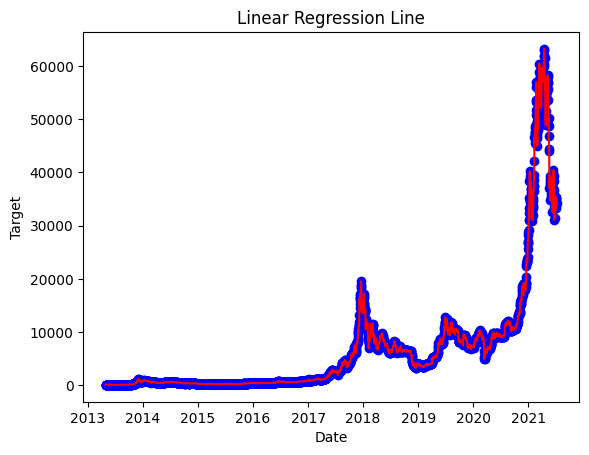

In [ ]:
plt.scatter(df.index, df['target'], color='blue')
plt.plot(df.index, model.predict(df.drop(['Name', 'Symbol', 'target'], axis=1)), color='red')
plt.title('Linear Regression Line')
plt.xlabel('Date')
plt.ylabel('Target')
plt.show()